## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765
0:	learn: 0.9793830	total: 47.8ms	remaining: 47.8s
1:	learn: 0.9582303	total: 48.8ms	remaining: 24.3s
2:	learn: 0.9353695	total: 49.7ms	remaining: 16.5s
3:	learn: 0.9161608	total: 50.6ms	remaining: 12.6s
4:	learn: 0.8990488	total: 51.6ms	remaining: 10.3s
5:	learn: 0.8832373	total: 52.4ms	remaining: 8.69s
6:	learn: 0.8650817	total: 53.3ms	remaining: 7.57s
7:	learn: 0.8477194	total: 54.2ms	remaining: 6.72s
8:	learn: 0.8311338	total: 55ms	remaining: 6.06s
9:	learn: 0.8132347	total: 55.9ms	remaining: 5.54s
10:	learn: 0.7953546	total: 56.8ms	remaining: 5.1s
11:	learn: 0.7796915	total: 57.6ms	remaining: 4.75s
12:	learn: 0.7641617	total: 58.6ms	remaining: 4.45s
13:	learn: 0.7484061	total: 59.5ms	remaining: 4.19s
14:	learn: 0.7353909	total: 60.3ms	remaining: 3.96s
15:	learn: 0.7199546	total: 61.2ms	remaining: 3.76s
16:	learn: 0.7058790	total: 62ms	remaining: 3.58s
17:	learn: 0.6928959	total: 62.8ms	remaining: 3.43s
18:	learn: 0.6802797	total: 63.8ms	remaining: 3.2

113:	learn: 0.2811402	total: 147ms	remaining: 1.14s
114:	learn: 0.2797104	total: 148ms	remaining: 1.14s
115:	learn: 0.2785930	total: 149ms	remaining: 1.14s
116:	learn: 0.2773867	total: 150ms	remaining: 1.13s
117:	learn: 0.2762157	total: 151ms	remaining: 1.13s
118:	learn: 0.2751476	total: 152ms	remaining: 1.12s
119:	learn: 0.2742685	total: 153ms	remaining: 1.12s
120:	learn: 0.2732505	total: 154ms	remaining: 1.11s
121:	learn: 0.2722779	total: 154ms	remaining: 1.11s
122:	learn: 0.2706818	total: 155ms	remaining: 1.11s
123:	learn: 0.2699505	total: 156ms	remaining: 1.1s
124:	learn: 0.2691699	total: 157ms	remaining: 1.1s
125:	learn: 0.2678759	total: 158ms	remaining: 1.09s
126:	learn: 0.2667829	total: 159ms	remaining: 1.09s
127:	learn: 0.2658124	total: 160ms	remaining: 1.09s
128:	learn: 0.2648855	total: 161ms	remaining: 1.08s
129:	learn: 0.2641466	total: 162ms	remaining: 1.08s
130:	learn: 0.2633410	total: 162ms	remaining: 1.08s
131:	learn: 0.2621334	total: 163ms	remaining: 1.07s
132:	learn: 0.

275:	learn: 0.1816464	total: 284ms	remaining: 744ms
276:	learn: 0.1813464	total: 285ms	remaining: 743ms
277:	learn: 0.1810632	total: 286ms	remaining: 742ms
278:	learn: 0.1808467	total: 286ms	remaining: 740ms
279:	learn: 0.1804819	total: 287ms	remaining: 739ms
280:	learn: 0.1800651	total: 288ms	remaining: 737ms
281:	learn: 0.1796570	total: 289ms	remaining: 736ms
282:	learn: 0.1792465	total: 290ms	remaining: 734ms
283:	learn: 0.1789390	total: 291ms	remaining: 733ms
284:	learn: 0.1785633	total: 291ms	remaining: 731ms
285:	learn: 0.1781925	total: 292ms	remaining: 729ms
286:	learn: 0.1777819	total: 293ms	remaining: 728ms
287:	learn: 0.1773282	total: 294ms	remaining: 726ms
288:	learn: 0.1769502	total: 295ms	remaining: 725ms
289:	learn: 0.1766256	total: 295ms	remaining: 723ms
290:	learn: 0.1762818	total: 296ms	remaining: 722ms
291:	learn: 0.1759812	total: 297ms	remaining: 720ms
292:	learn: 0.1756654	total: 298ms	remaining: 719ms
293:	learn: 0.1753518	total: 299ms	remaining: 718ms
294:	learn: 

436:	learn: 0.1364168	total: 421ms	remaining: 543ms
437:	learn: 0.1362182	total: 422ms	remaining: 542ms
438:	learn: 0.1360213	total: 423ms	remaining: 540ms
439:	learn: 0.1359071	total: 424ms	remaining: 539ms
440:	learn: 0.1356568	total: 425ms	remaining: 538ms
441:	learn: 0.1353241	total: 425ms	remaining: 537ms
442:	learn: 0.1351545	total: 426ms	remaining: 536ms
443:	learn: 0.1349249	total: 427ms	remaining: 535ms
444:	learn: 0.1346373	total: 428ms	remaining: 534ms
445:	learn: 0.1343300	total: 429ms	remaining: 533ms
446:	learn: 0.1339775	total: 430ms	remaining: 531ms
447:	learn: 0.1336963	total: 430ms	remaining: 530ms
448:	learn: 0.1334275	total: 431ms	remaining: 529ms
449:	learn: 0.1332987	total: 432ms	remaining: 528ms
450:	learn: 0.1331067	total: 433ms	remaining: 527ms
451:	learn: 0.1328279	total: 434ms	remaining: 526ms
452:	learn: 0.1325780	total: 435ms	remaining: 525ms
453:	learn: 0.1323446	total: 436ms	remaining: 524ms
454:	learn: 0.1320852	total: 436ms	remaining: 523ms
455:	learn: 

593:	learn: 0.1076261	total: 557ms	remaining: 380ms
594:	learn: 0.1074547	total: 558ms	remaining: 380ms
595:	learn: 0.1072754	total: 559ms	remaining: 379ms
596:	learn: 0.1071407	total: 559ms	remaining: 378ms
597:	learn: 0.1070094	total: 560ms	remaining: 377ms
598:	learn: 0.1068378	total: 561ms	remaining: 376ms
599:	learn: 0.1067240	total: 562ms	remaining: 375ms
600:	learn: 0.1066308	total: 563ms	remaining: 374ms
601:	learn: 0.1064834	total: 564ms	remaining: 373ms
602:	learn: 0.1063183	total: 565ms	remaining: 372ms
603:	learn: 0.1061908	total: 565ms	remaining: 371ms
604:	learn: 0.1060025	total: 566ms	remaining: 370ms
605:	learn: 0.1058657	total: 567ms	remaining: 369ms
606:	learn: 0.1057348	total: 568ms	remaining: 368ms
607:	learn: 0.1056360	total: 569ms	remaining: 367ms
608:	learn: 0.1054397	total: 569ms	remaining: 366ms
609:	learn: 0.1052296	total: 570ms	remaining: 365ms
610:	learn: 0.1050978	total: 571ms	remaining: 364ms
611:	learn: 0.1049759	total: 572ms	remaining: 362ms
612:	learn: 

753:	learn: 0.0854675	total: 692ms	remaining: 226ms
754:	learn: 0.0854359	total: 693ms	remaining: 225ms
755:	learn: 0.0853455	total: 694ms	remaining: 224ms
756:	learn: 0.0852547	total: 695ms	remaining: 223ms
757:	learn: 0.0851671	total: 695ms	remaining: 222ms
758:	learn: 0.0850702	total: 696ms	remaining: 221ms
759:	learn: 0.0849800	total: 697ms	remaining: 220ms
760:	learn: 0.0848933	total: 698ms	remaining: 219ms
761:	learn: 0.0846586	total: 699ms	remaining: 218ms
762:	learn: 0.0845349	total: 700ms	remaining: 217ms
763:	learn: 0.0844346	total: 701ms	remaining: 216ms
764:	learn: 0.0843622	total: 702ms	remaining: 215ms
765:	learn: 0.0842870	total: 702ms	remaining: 215ms
766:	learn: 0.0841950	total: 703ms	remaining: 214ms
767:	learn: 0.0841282	total: 704ms	remaining: 213ms
768:	learn: 0.0840619	total: 705ms	remaining: 212ms
769:	learn: 0.0839081	total: 706ms	remaining: 211ms
770:	learn: 0.0837202	total: 707ms	remaining: 210ms
771:	learn: 0.0835524	total: 708ms	remaining: 209ms
772:	learn: 

913:	learn: 0.0703179	total: 831ms	remaining: 78.2ms
914:	learn: 0.0702500	total: 831ms	remaining: 77.2ms
915:	learn: 0.0702212	total: 832ms	remaining: 76.3ms
916:	learn: 0.0700883	total: 833ms	remaining: 75.4ms
917:	learn: 0.0699883	total: 834ms	remaining: 74.5ms
918:	learn: 0.0699332	total: 835ms	remaining: 73.6ms
919:	learn: 0.0698475	total: 836ms	remaining: 72.7ms
920:	learn: 0.0697426	total: 837ms	remaining: 71.8ms
921:	learn: 0.0696181	total: 838ms	remaining: 70.9ms
922:	learn: 0.0694964	total: 838ms	remaining: 69.9ms
923:	learn: 0.0694349	total: 839ms	remaining: 69ms
924:	learn: 0.0693576	total: 840ms	remaining: 68.1ms
925:	learn: 0.0692736	total: 841ms	remaining: 67.2ms
926:	learn: 0.0692230	total: 842ms	remaining: 66.3ms
927:	learn: 0.0690717	total: 843ms	remaining: 65.4ms
928:	learn: 0.0689558	total: 844ms	remaining: 64.5ms
929:	learn: 0.0688445	total: 844ms	remaining: 63.6ms
930:	learn: 0.0687669	total: 845ms	remaining: 62.6ms
931:	learn: 0.0686594	total: 846ms	remaining: 61

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

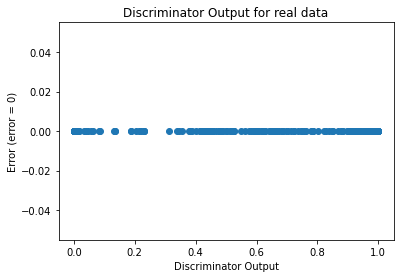

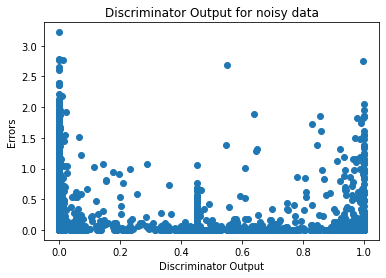

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

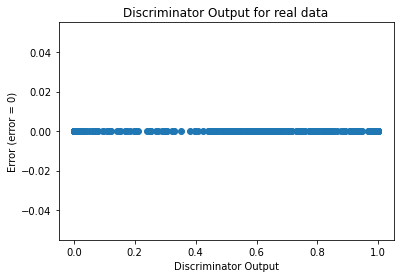

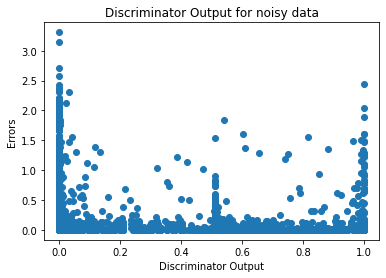

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8943]], device='cuda:0', requires_grad=True)
